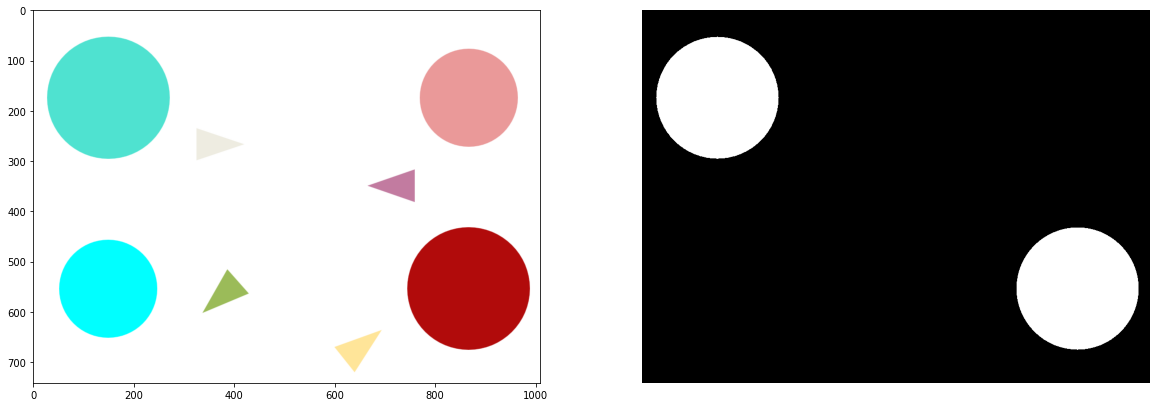

In [4]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

imagem = cv2.imread("PrintNac.png")

imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
imagem_hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

red_lower_hsv = np.array([170, 11, 11])
red_upper_hsv = np.array([177, 15, 15])

blue_lower_hsv = np.array([75, 225, 200]) 
blue_upper_hsv = np.array([85, 230, 208])

Red = cv2.inRange(imagem_rgb, red_lower_hsv, red_upper_hsv)
Blue = cv2.inRange(imagem_rgb, blue_lower_hsv, blue_upper_hsv)

imagem_2 = Red + Blue


fig = plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(imagem_rgb)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(imagem_2 , cmap="Greys_r", vmin=0, vmax=255)
plt.show()

<Figure size 576x432 with 0 Axes>

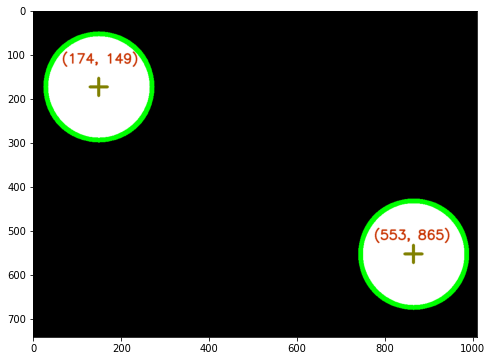

In [9]:
contornos, _ = cv2.findContours(Red, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
mascara1= cv2.cvtColor(Red, cv2.COLOR_GRAY2RGB) 
contorno_masck1 = mascara1.copy()

cv2.drawContours(contorno_masck1, contornos, -1, [0, 255, 0], 10);


plt.figure(figsize=(8,6));


cnt = contornos[0]

M = cv2.moments(cnt)

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

bx1 = cx
by1 = cy

size = 20
color = (128,128,0)


cv2.line(contorno_masck1,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contorno_masck1,(cx,cy - size),(cx, cy + size),color,5)


font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem = (775,520)

cv2.putText(contorno_masck1, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)




contornos, _ = cv2.findContours(Blue, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
mascara2 = cv2.cvtColor(Blue, cv2.COLOR_GRAY2RGB) 
contorno_masck2 = mascara2.copy()
cv2.drawContours(contorno_masck2, contornos, -1, [0, 255, 0], 10);

plt.figure(figsize=(8,6));
plt.imshow(contorno_masck2);

cnt = contornos[0]

M = cv2.moments(cnt)

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

bx2 = cx
by2 = cy

size = 20
color = (128,128,0)


cv2.line(contorno_masck2,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contorno_masck2,(cx,cy - size),(cx, cy + size),color,5)


font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem = (65,120)

cv2.putText(contorno_masck2, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


img_completa = contorno_masck1 + contorno_masck2
plt.imshow(img_completa);


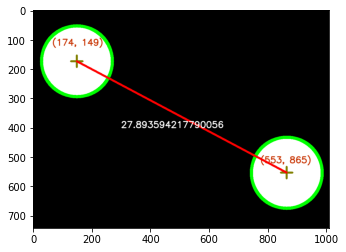

In [10]:
linha = (255, 0, 0)
cv2.line(img_completa, (bx1, by1), (bx2, by2), linha, 5)
plt.imshow(img_completa)


angulo = math.atan2(by1 - by2, bx1 - bx2)
tangente = math.tan(angulo)

origem = (300,400)

cv2.putText(img_completa, str(math.degrees(angulo)), origem, font,1,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img_completa)
